In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # Bilimsel gösterimler kapat

In [2]:
data = np.loadtxt("fake_bills.csv", delimiter=',', skiprows= 1)

X = data[:, [1, 2]] # Diagonal, Length
y = data[:, 0] # Is Genuine

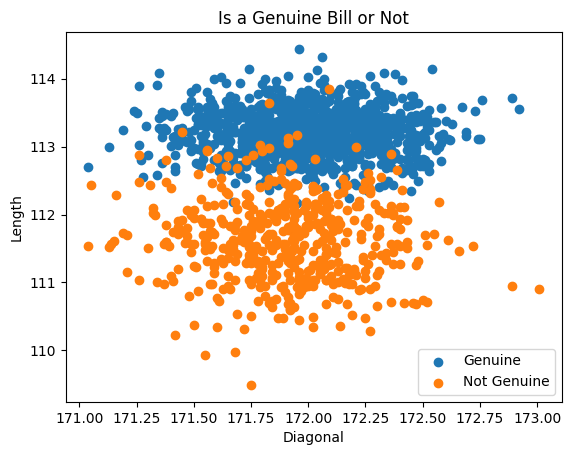

In [3]:
# Visualize data
plt.figure()
plt.title("Is a Genuine Bill or Not")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Genuine")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not Genuine")
plt.xlabel("Diagonal")
plt.ylabel("Length")
plt.legend()
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunction(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    J = -(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
    grad = np.dot(X.T, h - y) / X.shape[0]
    return J, grad

def cost(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    J = - (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
    return J

In [5]:
def gradient(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, h - y) / X.shape[0]
    return grad

def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha)
                 * gradient(theta, X, y))   
        J_history[i] = cost(theta, X, y)
    return theta, J_history

In [6]:
def plotDecisionBoundaries(theta_list, X, y, iterations_list, colors):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))

    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Genuine")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not Genuine")

    # Plot each decision boundary with a unique color and label
    for idx, (theta, color) in enumerate(zip(theta_list, colors)):
        y_plot = np.dot(X_plot, theta).reshape(xx.shape)
        contour = plt.contour(xx, yy, y_plot, levels=[0], colors=[color])
        # Add labels for each line with color and iteration count
        contour.set_label(f"{color.capitalize()}: {iterations_list[idx]} Iterations")

    plt.xlabel("Diagonal")
    plt.ylabel("Length")
    plt.legend()
    plt.show()

In [7]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X)) 
# 3 farklı iterasyon sayıları
my_iterations = [5000, 35000, 150000]
# theta
theta_initial = np.array([0, 0, 0])
# alpha değeri
alpha = 0.003
# cost değerlerini saklamak için sözlük yapısı
cost_values = {}

/var/folders/zl/st9rr20n6v75_mwpwkkwblr80000gn/T/ipykernel_21459/2315731308.py:12: RuntimeWarning: divide by zero encountered in log
  J = - (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
/var/folders/zl/st9rr20n6v75_mwpwkkwblr80000gn/T/ipykernel_21459/1731792949.py:23: UserWarning: Legend does not support handles for QuadContourSet instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


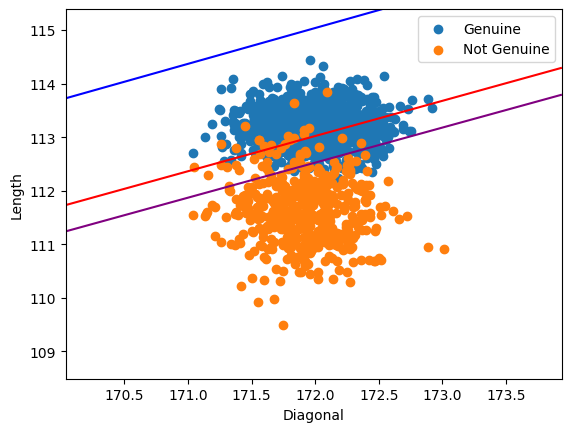

In [8]:
# decision baundary'ler için renkler
colors = ['blue', 'purple', 'red']
theta_list = []
for num_iters in my_iterations:
    theta = np.copy(theta_initial)
    theta, J_history = gradientDescent(X_train, y, theta, alpha, num_iters)
    theta_list.append(theta)
    cost_values[num_iters] = float(cost(theta, X_train, y))

plotDecisionBoundaries(theta_list, X, y, my_iterations, colors)
# en iyi iterasyon değeri
best_iteration_value = 35000

In [9]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.hstack((out, (X1 ** (i - j) * X2 ** j)[:, np.newaxis]))
    return out

X_train = mapFeature(X[:, 0], X[:, 1])

In [10]:
def cost(theta, X, y, lam):
    h = sigmoid(np.dot(X, theta))
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    J = (-(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
         + lam * np.dot(t, t) / (2 * X.shape[0]))
    return J

In [11]:
def gradient(theta, X, y, lam):
    h = sigmoid(np.dot(X, theta))
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    grad = np.dot(X.T, h - y) / X.shape[0] + lam * t / X.shape[0]
    return grad

def gradientDescent(X, y, theta, alpha, lam, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha)
                 * gradient(theta, X, y, lam))   
        J_history[i] = cost(theta, X, y, lam)
    return theta, J_history

In [12]:
def plotDecisionBoundaries(theta_list, X, y, lambda_values, colors):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))

    X_plot = mapFeature(X_plot[:, 1], X_plot[:, 2])
    
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Genuine")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not Genuine")

    # Plot each decision boundary with a unique color and label
    for idx, (theta, color) in enumerate(zip(theta_list, colors)):
        y_plot = np.dot(X_plot, theta).reshape(xx.shape)
        contour = plt.contour(xx, yy, y_plot, levels=[0], colors=[color])
        # Add labels for each line with color and iteration count
        contour.set_label(f"{color.capitalize()}-Lambda: {lambda_values[idx]}")

    plt.xlabel("Diagonal")
    plt.ylabel("Length")
    plt.legend()
    plt.show()

In [13]:
# 5 farklı lambda değeri
lambda_values = [0, 30, 200, 2500, 3500]

# Theta'nın ilk başlangıç değeri
theta_initial = np.zeros(X_train.shape[1])

/var/folders/zl/st9rr20n6v75_mwpwkkwblr80000gn/T/ipykernel_21459/2868961653.py:5: RuntimeWarning: divide by zero encountered in log
  J = (-(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
/var/folders/zl/st9rr20n6v75_mwpwkkwblr80000gn/T/ipykernel_21459/2315731308.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/zl/st9rr20n6v75_mwpwkkwblr80000gn/T/ipykernel_21459/1937999919.py:25: UserWarning: Legend does not support handles for QuadContourSet instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


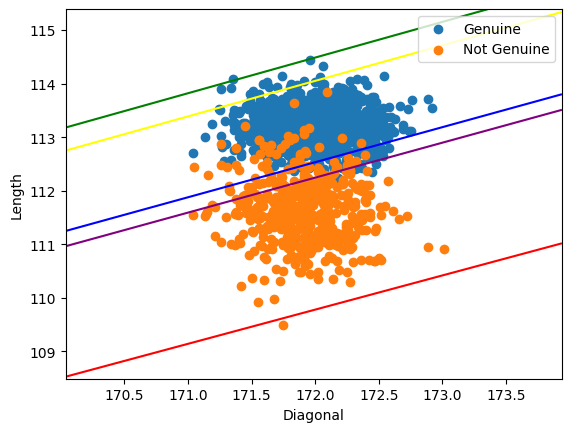

In [14]:
theta_list = []
colors = ['blue', 'purple', 'red', 'yellow', 'green']

for lam in lambda_values:
    theta = np.copy(theta_initial)
    theta, J_history = gradientDescent(X_train, y, theta_initial, alpha, lam, best_iteration_value)
    theta_list.append(theta)

plotDecisionBoundaries(theta_list, X, y, lambda_values, colors)